## Aadarsh Ganta

### Research questions
1. What state experienced the highest increase in population from 2020 to 2021?
2. What is the average minutes played for the top 50 NBA players in points per game this season?
3. What food category contains the highest amount of Vitamin C?

### Sources
- List out the name and URL for each of your data sources
- United States Census Data: https://api.census.gov/data/2013/language.html?get=EST,LANLABEL,NAME&for=state:06&LAN=625
- NBA Statistics: https://www.nba.com/stats/leaders?SeasonType=Regular+Season&PerMode=PerGame&StatCategory=PTS
- Food Data: https://corgis-edu.github.io/corgis/json/food/

In [23]:
'''Imports and Utility Functions'''
import requests
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
''' Public API: your findings '''
#URLs for the population data in 2020 and 2021 for all US states
url2020 = 'https://api.census.gov/data/2021/pep/population?get=NAME,POP_2020&for=state'
url2021 = 'https://api.census.gov/data/2021/pep/population?get=NAME,POP_2021&for=state'
#Obtains the data from the urls using the requests module
response1 = requests.get(url2020)
response2 = requests.get(url2021)
#Converts the data into a json format
data2020 = response1.json()
data2021 = response2.json()
#Creates a dictionary containing the difference in population from 2020 to 2021 for all states
states = {}
for i in range(1, len(data2021)):
    states[data2021[i][0]] = int(data2021[i][1]) - int(data2020[i][1])
#Finds the state that had the highest increase in population
maxValue = max(states)
print(maxValue, 'experienced the highest increase in population from 2020 to 2021')


Wyoming experienced the highest increase in population from 2020 to 2021


In [111]:
''' Web Scraping: your findings '''
#URL containing statistics on NBA players sorted by highest points per game this season
url = 'https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=PerGame&Scope=S&Season=2022-23&SeasonType=Regular%20Season&StatCategory=PTS'
#Obtains the data from the url using the requests module
response = requests.get(url).json()
#Sorts the data by displaying only the statistics for the top 50 players in points per game in a list of lists
data = response['resultSet']['rowSet'][:50]
#Creates a list containing the minutes per game for each of the 50 players
minsList = []
for player in data:
    minsList.append(player[6])
#Calculates the average minutes per game for these 50 players
avgMins = round(sum(minsList)/50, 1)
print('The average minutes played for the top 50 NBA players in points per game this season was', avgMins)


The average minutes played for the top 50 NBA players in points per game this season was 34.4


In [135]:
''' Direct Download: your findings '''
#URL containing data on ingredients in different types of food categories
url = "https://corgis-edu.github.io/corgis/datasets/json/food/food.json"
filename = 'food.txt'
#Downloads the file using a URL 
if not os.path.isfile(filename):
    with open(filename, "wb") as f:
        f.write(requests.get(url).content)
#Opens the file and converts it into a readable JSON format
with open(filename) as file:
    text = file.read()
data = json.loads(text)
#Creates a list containing the amount of Vitamin C in each food category
vitaminC = []
for food in data:
    vitaminC.append(food['Data']['Vitamins']['Vitamin C'])
#Creates a dataframe using the list that contains the index for each food category and its amount of Vitamin C
df['VitaminC'] = vitaminC
#Locates the food category that has the highest amount of Vitamin C by finding the index for the maximum value in the datafram
foodCategory = df.loc[df['VitaminC'].idxmax()]['Category']
print('The food category that contains the most vitamin C is the', maxVitaminC)

The food category that contains the most vitamin C is the Fruit flavored drink


<function matplotlib.pyplot.show(close=None, block=None)>

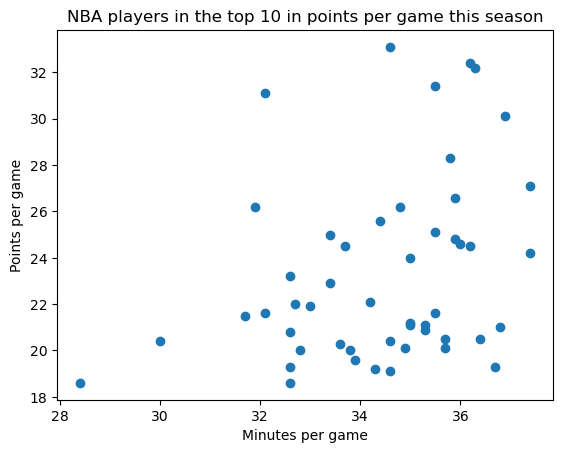

In [108]:
''' Visualization: '''
url = 'https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=PerGame&Scope=S&Season=2022-23&SeasonType=Regular%20Season&StatCategory=PTS'
response = requests.get(url).json()
data = response['resultSet']['rowSet'][:50]
minsList = []
pointsList = []
for player in data:
    minsList.append(player[6])
    pointsList.append(player[23])
minsList
pointsList
plt.scatter(minsList, pointsList)
plt.xlabel('Minutes per game')
plt.ylabel('Points per game')
plt.title('NBA players in the top 50 in points per game this season')
plt.show


**Visual Description:**
A scatterplot that shows the relationship between the minutes per game and points per game for the top 50 NBA players who averaged the most points this season. The x-axis, which ranges from 28 to 37, represents the minutes per game for each player and the y-axis, which ranges from 18 to 33, represents the points per game for each player. It can be seen that the data points trend towards the right direction and the majority of the players averaged more than 35 minutes per game. In addition, the player who averaged the least minutes per game also averaged the lowest points per game. There is a positive correlation among the data because as the number of minutes per game increases, the number of points per game also increases. This visual shows that the number of minutes a player averages a game directly affects the number of points they average because they have more time to score.
